In [1]:
import pandas as pd
import numpy as np

In [5]:
df_1= pd.read_excel('final.xlsx')

In [2]:
df_2= pd.read_excel(r'\Users\vksva\Downloads\ML.Data.2.xlsx',1)

In [3]:
df_2.head()

,Year Month,Period,Completed Jobs,Income,Lead Calls,Canceled Jobs,Future Scheduled Jobs
0,2018 December,12/31/2018,64.0,96536.0,63,10.0,57.0
1,2019 January,01/01/2019,NaN,NaN,14,NaN,9.0
2,2019 January,01/02/2019,85.0,81680.5,91,13.0,97.0
3,2019 January,01/03/2019,90.0,100885.0,83,5.0,95.0
4,2019 January,01/04/2019,85.0,25694.2,89,5.0,94.0


In [6]:
df_1.head()

,Unnamed: 0,Day,Day of week,Cost,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost / conv.,Search Impr. share,Search Lost IS (rank),Search Lost IS (budget),Zip,Income,lat,lng
0,0,2019-01-02,2,1298.05,44533,54,0.0012,24.04,15.0,0.0540,86.54,0.3500,0.0935,0.5565,92392,104993.5,34.479332,-117.397422
1,1,2019-01-03,3,1480.26,2221,59,0.0266,25.09,10.1,0.1712,146.56,0.5233,0.1120,0.3647,90003,40865.2,33.963074,-118.274809
2,2,2019-01-04,4,1953.52,36095,110,0.0030,17.76,22.0,0.0295,85.93,0.6041,0.2028,0.1931,92201,91188.0,33.711551,-116.236141
3,3,2019-01-05,5,2507.57,18171,123,0.0068,20.39,29.5,0.0127,85.00,0.7161,0.1884,0.0955,92625,55627.0,33.601873,-117.866850
4,4,2019-01-06,6,1591.91,15185,88,0.0058,18.09,16.5,0.0087,96.48,0.7447,0.2129,0.0424,92596,12713.0,33.638018,-117.088880


In [7]:
df_3= pd.read_excel(r'\Users\vksva\Downloads\ML.Data.2.xlsx',0)

In [8]:
df_3.head()

,Job Type,Location Zip,Income,Converted,Cancel Reason,Pricebook Price,Price Variation,Created Date,Location City,Assigned Technicians,Sold Hours,Primary Technician,Total Technician Paid Time,Total Revenue
0,System Diagnostic,92646,759.18,1.0,NaN,857.4,-0.114556,2020-06-11,Huntington Beach,George Ramirez - (OC),0,George Ramirez - (OC),2.000000,759.18
1,Miscellaneous,NaN,479.00,1.0,NaN,0.0,NaN,2019-05-13,NaN,DO NOT USE,0,DO NOT USE,0.250000,479.00
2,XPP Refferal,90605,0.00,1.0,NaN,0.0,NaN,2019-07-23,Whittier,Mark Ocampo,0,Mark Ocampo,2.716667,0.00
3,System Diagnostic,92833,300.00,1.0,NaN,0.0,NaN,2019-08-03,Fullerton,Ruben Ramos-57 (OC),0,Ruben Ramos-57 (OC),1.983333,300.00
4,HSP Maintenance,92647,179.40,1.0,NaN,359.4,-0.500835,2019-04-01,Huntington Beach,"Joel Chavarri (OC)-64, DO NOT USE",0,DO NOT USE,2.633333,179.40


In [11]:
df_3['Location Zip'].nunique()

568

In [9]:
df_3.shape

(36429, 14)

In [12]:
df_3= df_3.sort_values('Created Date')

In [13]:
df_3.head()

,Job Type,Location Zip,Income,Converted,Cancel Reason,Pricebook Price,Price Variation,Created Date,Location City,Assigned Technicians,Sold Hours,Primary Technician,Total Technician Paid Time,Total Revenue
4548,Call Back,92808,100.0,1.0,NaN,0.0,NaN,2019-01-02,Anaheim,"Jose Valdez, DO NOT USE",0,DO NOT USE,1.116667,100.0
7110,System Tune-Up,90706,411.0,1.0,NaN,0.0,NaN,2019-01-02,Bellflower,"John Banks, DO NOT USE",0,DO NOT USE,2.300000,411.0
7113,Job Walk Through,90731,0.0,1.0,NaN,0.0,NaN,2019-01-02,San Pedro,Raul Martinez,0,Raul Martinez,1.866667,0.0
7114,Mini Splits,90731,15995.0,1.0,NaN,0.0,NaN,2019-01-02,San Pedro,"Walter Del Cid, Tony Santana, Ulises Jimenez -...",0,Tony Santana,104.133333,15995.0
7040,Furnace Change Out,92801,1800.0,1.0,NaN,0.0,NaN,2019-01-02,Anaheim,"Tony Santana, Mario Renteria, Roman Gutierrez",0,Tony Santana,4.033333,1800.0


In [14]:
df_3["group_rank"] = df_3.groupby("Created Date")["Total Revenue"].rank(ascending=1,method='dense')


In [15]:
df_3.head()

,Job Type,Location Zip,Income,Converted,Cancel Reason,Pricebook Price,Price Variation,Created Date,Location City,Assigned Technicians,Sold Hours,Primary Technician,Total Technician Paid Time,Total Revenue,group_rank
4548,Call Back,92808,100.0,1.0,NaN,0.0,NaN,2019-01-02,Anaheim,"Jose Valdez, DO NOT USE",0,DO NOT USE,1.116667,100.0,3.0
7110,System Tune-Up,90706,411.0,1.0,NaN,0.0,NaN,2019-01-02,Bellflower,"John Banks, DO NOT USE",0,DO NOT USE,2.300000,411.0,10.0
7113,Job Walk Through,90731,0.0,1.0,NaN,0.0,NaN,2019-01-02,San Pedro,Raul Martinez,0,Raul Martinez,1.866667,0.0,1.0
7114,Mini Splits,90731,15995.0,1.0,NaN,0.0,NaN,2019-01-02,San Pedro,"Walter Del Cid, Tony Santana, Ulises Jimenez -...",0,Tony Santana,104.133333,15995.0,27.0
7040,Furnace Change Out,92801,1800.0,1.0,NaN,0.0,NaN,2019-01-02,Anaheim,"Tony Santana, Mario Renteria, Roman Gutierrez",0,Tony Santana,4.033333,1800.0,14.0


In [16]:
x=df_3.groupby('Created Date').group_rank.max()

In [17]:
x=pd.DataFrame(x)

In [18]:
a=x.add_suffix('').reset_index()

In [19]:
a.head()

,Created Date,group_rank
0,2019-01-02,28.0
1,2019-01-03,22.0
2,2019-01-04,21.0
3,2019-01-05,10.0
4,2019-01-06,5.0


In [20]:
mer= pd.merge(df_3,a,on=['Created Date','group_rank'])

In [21]:
mer.head()

,Job Type,Location Zip,Income,Converted,Cancel Reason,Pricebook Price,Price Variation,Created Date,Location City,Assigned Technicians,Sold Hours,Primary Technician,Total Technician Paid Time,Total Revenue,group_rank
0,(2) 3 pc Change Outs,92392,17990.0,1.0,NaN,0.0,NaN,2019-01-02,Victorville,"Benny Batiz - IE, Javier Leon , Jorge Perez - ...",0,DO NOT USE,22.050000,17990.0,28.0
1,Furnace Change Out A/C Add On,90003,19749.0,1.0,NaN,0.0,NaN,2019-01-03,Los Angeles,Tony Santana,0,Tony Santana,0.000000,19749.0,22.0
2,3 pc Change Out W/ Full Reduct,92201,13000.0,1.0,NaN,0.0,NaN,2019-01-04,Indio,"Freddy P, Pablo Aguilar, Omar Ramos-PD/IE, Jua...",0,Freddy P,16.949999,13000.0,21.0
3,Furnace Change Out A/C Add with Full Reduct,92625,16500.0,1.0,NaN,0.0,NaN,2019-01-05,Corona Del Mar,"Tony Santana, Pedro Gallardo - Lead, Edgar Fig...",0,Tony Santana,110.566664,16500.0,10.0
4,3 pc Change Out,92596,7635.0,1.0,NaN,0.0,NaN,2019-01-06,Winchester,"Ranferi Perez (Ronnie), Jose Alonzo - Lead (Ch...",0,Ernesto Gonzalez,11.516667,7635.0,5.0


In [48]:
mer['Day']=mer['Created Date']

In [49]:
mer.head()

,Job Type,Location Zip,Income,Converted,Cancel Reason,Pricebook Price,Price Variation,Created Date,Location City,Assigned Technicians,Sold Hours,Primary Technician,Total Technician Paid Time,Total Revenue,group_rank,Day
0,(2) 3 pc Change Outs,92392,17990.0,1.0,NaN,0.0,NaN,2019-01-02,Victorville,"Benny Batiz - IE, Javier Leon , Jorge Perez - ...",0,DO NOT USE,22.050000,17990.0,28.0,2019-01-02
1,Furnace Change Out A/C Add On,90003,19749.0,1.0,NaN,0.0,NaN,2019-01-03,Los Angeles,Tony Santana,0,Tony Santana,0.000000,19749.0,22.0,2019-01-03
2,3 pc Change Out W/ Full Reduct,92201,13000.0,1.0,NaN,0.0,NaN,2019-01-04,Indio,"Freddy P, Pablo Aguilar, Omar Ramos-PD/IE, Jua...",0,Freddy P,16.949999,13000.0,21.0,2019-01-04
3,Furnace Change Out A/C Add with Full Reduct,92625,16500.0,1.0,NaN,0.0,NaN,2019-01-05,Corona Del Mar,"Tony Santana, Pedro Gallardo - Lead, Edgar Fig...",0,Tony Santana,110.566664,16500.0,10.0,2019-01-05
4,3 pc Change Out,92596,7635.0,1.0,NaN,0.0,NaN,2019-01-06,Winchester,"Ranferi Perez (Ronnie), Jose Alonzo - Lead (Ch...",0,Ernesto Gonzalez,11.516667,7635.0,5.0,2019-01-06


In [50]:
mer=mer.drop(['Income','Created Date'],axis=1)

In [52]:
mer['Zip']=mer['Location Zip']
mer=mer.drop(['Location Zip'],axis=1)

In [53]:
mer.head()

,Job Type,Converted,Cancel Reason,Pricebook Price,Price Variation,Location City,Assigned Technicians,Sold Hours,Primary Technician,Total Technician Paid Time,Total Revenue,group_rank,Day,Zip
0,(2) 3 pc Change Outs,1.0,NaN,0.0,NaN,Victorville,"Benny Batiz - IE, Javier Leon , Jorge Perez - ...",0,DO NOT USE,22.050000,17990.0,28.0,2019-01-02,92392
1,Furnace Change Out A/C Add On,1.0,NaN,0.0,NaN,Los Angeles,Tony Santana,0,Tony Santana,0.000000,19749.0,22.0,2019-01-03,90003
2,3 pc Change Out W/ Full Reduct,1.0,NaN,0.0,NaN,Indio,"Freddy P, Pablo Aguilar, Omar Ramos-PD/IE, Jua...",0,Freddy P,16.949999,13000.0,21.0,2019-01-04,92201
3,Furnace Change Out A/C Add with Full Reduct,1.0,NaN,0.0,NaN,Corona Del Mar,"Tony Santana, Pedro Gallardo - Lead, Edgar Fig...",0,Tony Santana,110.566664,16500.0,10.0,2019-01-05,92625
4,3 pc Change Out,1.0,NaN,0.0,NaN,Winchester,"Ranferi Perez (Ronnie), Jose Alonzo - Lead (Ch...",0,Ernesto Gonzalez,11.516667,7635.0,5.0,2019-01-06,92596


In [28]:
df_3['Location City'].value_counts()


Anaheim            2074
Riverside          1617
Los Angeles        1507
Palm Desert        1043
Corona              893
                   ... 
vista                 1
la harbra             1
West covina           1
chino                 1
hacienda height       1
Name: Location City, Length: 506, dtype: int64

In [29]:
mer.shape

(776, 15)

In [31]:
df_1=df_1.drop(['Income'],axis=1)

In [32]:
df_1.head()

,Day,Day of week,Cost,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost / conv.,Search Impr. share,Search Lost IS (rank),Search Lost IS (budget),Zip
0,2019-01-02,2,1298.05,44533,54,0.0012,24.04,15.0,0.0540,86.54,0.3500,0.0935,0.5565,92392
1,2019-01-03,3,1480.26,2221,59,0.0266,25.09,10.1,0.1712,146.56,0.5233,0.1120,0.3647,90003
2,2019-01-04,4,1953.52,36095,110,0.0030,17.76,22.0,0.0295,85.93,0.6041,0.2028,0.1931,92201
3,2019-01-05,5,2507.57,18171,123,0.0068,20.39,29.5,0.0127,85.00,0.7161,0.1884,0.0955,92625
4,2019-01-06,6,1591.91,15185,88,0.0058,18.09,16.5,0.0087,96.48,0.7447,0.2129,0.0424,92596


In [33]:
df_2.shape

(785, 7)

In [34]:
df_1.shape

(758, 14)

In [35]:
df_2['Day']=df_2['Period']

In [13]:
df_2=df_2.drop(['Period'],axis=1)

In [36]:
df_2.head()

,Year Month,Period,Completed Jobs,Income,Lead Calls,Canceled Jobs,Future Scheduled Jobs,Day
0,2018 December,12/31/2018,64.0,96536.0,63,10.0,57.0,12/31/2018
1,2019 January,01/01/2019,NaN,NaN,14,NaN,9.0,01/01/2019
2,2019 January,01/02/2019,85.0,81680.5,91,13.0,97.0,01/02/2019
3,2019 January,01/03/2019,90.0,100885.0,83,5.0,95.0,01/03/2019
4,2019 January,01/04/2019,85.0,25694.2,89,5.0,94.0,01/04/2019


In [37]:
df=pd.DataFrame(df_2['Day'])

In [38]:
df

,Day
0,12/31/2018
1,01/01/2019
2,01/02/2019
3,01/03/2019
4,01/04/2019
...,...
780,02/18/2021
781,02/19/2021
782,02/20/2021
783,02/21/2021


In [39]:
df_2['Day']=pd.to_datetime(df.Day)

In [40]:
df_2.head()

,Year Month,Period,Completed Jobs,Income,Lead Calls,Canceled Jobs,Future Scheduled Jobs,Day
0,2018 December,12/31/2018,64.0,96536.0,63,10.0,57.0,2018-12-31
1,2019 January,01/01/2019,NaN,NaN,14,NaN,9.0,2019-01-01
2,2019 January,01/02/2019,85.0,81680.5,91,13.0,97.0,2019-01-02
3,2019 January,01/03/2019,90.0,100885.0,83,5.0,95.0,2019-01-03
4,2019 January,01/04/2019,85.0,25694.2,89,5.0,94.0,2019-01-04


In [41]:
df_1['Day']=pd.to_datetime(df_1['Day'])

In [42]:
df_1.dtypes

Day                        datetime64[ns]
Day of week                         int64
Cost                              float64
Impressions                         int64
Clicks                              int64
CTR                               float64
Avg. CPC                          float64
Conversions                       float64
Conv. rate                        float64
Cost / conv.                      float64
Search Impr. share                float64
Search Lost IS (rank)             float64
Search Lost IS (budget)           float64
Zip                                 int64
dtype: object

In [43]:
df_2.dtypes

Year Month                       object
Period                           object
Completed Jobs                  float64
Income                          float64
Lead Calls                        int64
Canceled Jobs                   float64
Future Scheduled Jobs           float64
Day                      datetime64[ns]
dtype: object

In [44]:
new_df= pd.merge(df_1,df_2,on='Day')

In [45]:
new_df.head()

,Day,Day of week,Cost,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost / conv.,...,Search Lost IS (rank),Search Lost IS (budget),Zip,Year Month,Period,Completed Jobs,Income,Lead Calls,Canceled Jobs,Future Scheduled Jobs
0,2019-01-02,2,1298.05,44533,54,0.0012,24.04,15.0,0.0540,86.54,...,0.0935,0.5565,92392,2019 January,01/02/2019,85.0,81680.5,91,13.0,97.0
1,2019-01-03,3,1480.26,2221,59,0.0266,25.09,10.1,0.1712,146.56,...,0.1120,0.3647,90003,2019 January,01/03/2019,90.0,100885.0,83,5.0,95.0
2,2019-01-04,4,1953.52,36095,110,0.0030,17.76,22.0,0.0295,85.93,...,0.2028,0.1931,92201,2019 January,01/04/2019,85.0,25694.2,89,5.0,94.0
3,2019-01-05,5,2507.57,18171,123,0.0068,20.39,29.5,0.0127,85.00,...,0.1884,0.0955,92625,2019 January,01/05/2019,82.0,92705.0,53,7.0,83.0
4,2019-01-06,6,1591.91,15185,88,0.0058,18.09,16.5,0.0087,96.48,...,0.2129,0.0424,92596,2019 January,01/06/2019,16.0,14062.0,41,4.0,21.0


In [46]:
new_df=new_df.drop(['Year Month'],axis=1)

In [47]:
new_df.head()

,Day,Day of week,Cost,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost / conv.,Search Impr. share,Search Lost IS (rank),Search Lost IS (budget),Zip,Period,Completed Jobs,Income,Lead Calls,Canceled Jobs,Future Scheduled Jobs
0,2019-01-02,2,1298.05,44533,54,0.0012,24.04,15.0,0.0540,86.54,0.3500,0.0935,0.5565,92392,01/02/2019,85.0,81680.5,91,13.0,97.0
1,2019-01-03,3,1480.26,2221,59,0.0266,25.09,10.1,0.1712,146.56,0.5233,0.1120,0.3647,90003,01/03/2019,90.0,100885.0,83,5.0,95.0
2,2019-01-04,4,1953.52,36095,110,0.0030,17.76,22.0,0.0295,85.93,0.6041,0.2028,0.1931,92201,01/04/2019,85.0,25694.2,89,5.0,94.0
3,2019-01-05,5,2507.57,18171,123,0.0068,20.39,29.5,0.0127,85.00,0.7161,0.1884,0.0955,92625,01/05/2019,82.0,92705.0,53,7.0,83.0
4,2019-01-06,6,1591.91,15185,88,0.0058,18.09,16.5,0.0087,96.48,0.7447,0.2129,0.0424,92596,01/06/2019,16.0,14062.0,41,4.0,21.0


In [57]:
mer.dtypes

Job Type                              object
Converted                            float64
Cancel Reason                         object
Pricebook Price                      float64
Price Variation                      float64
Location City                         object
Assigned Technicians                  object
Sold Hours                             int64
Primary Technician                    object
Total Technician Paid Time           float64
Total Revenue                        float64
group_rank                           float64
Day                           datetime64[ns]
Zip                                   object
dtype: object

In [58]:
mer['Zip'] = mer['Zip'].astype(str).astype(int)


In [59]:
final_df= pd.merge(new_df,mer,on=['Day','Zip'])

In [60]:
final_df.head()

,Day,Day of week,Cost,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost / conv.,...,Cancel Reason,Pricebook Price,Price Variation,Location City,Assigned Technicians,Sold Hours,Primary Technician,Total Technician Paid Time,Total Revenue,group_rank
0,2019-01-02,2,1298.05,44533,54,0.0012,24.04,15.0,0.0540,86.54,...,NaN,0.0,NaN,Victorville,"Benny Batiz - IE, Javier Leon , Jorge Perez - ...",0,DO NOT USE,22.050000,17990.0,28.0
1,2019-01-03,3,1480.26,2221,59,0.0266,25.09,10.1,0.1712,146.56,...,NaN,0.0,NaN,Los Angeles,Tony Santana,0,Tony Santana,0.000000,19749.0,22.0
2,2019-01-04,4,1953.52,36095,110,0.0030,17.76,22.0,0.0295,85.93,...,NaN,0.0,NaN,Indio,"Freddy P, Pablo Aguilar, Omar Ramos-PD/IE, Jua...",0,Freddy P,16.949999,13000.0,21.0
3,2019-01-05,5,2507.57,18171,123,0.0068,20.39,29.5,0.0127,85.00,...,NaN,0.0,NaN,Corona Del Mar,"Tony Santana, Pedro Gallardo - Lead, Edgar Fig...",0,Tony Santana,110.566664,16500.0,10.0
4,2019-01-06,6,1591.91,15185,88,0.0058,18.09,16.5,0.0087,96.48,...,NaN,0.0,NaN,Winchester,"Ranferi Perez (Ronnie), Jose Alonzo - Lead (Ch...",0,Ernesto Gonzalez,11.516667,7635.0,5.0


In [67]:
final_df.shape

(759, 32)

In [65]:
final_df['Price Variation'].isnull().sum()

355

In [61]:
final_df.columns

Index(['Day', 'Day of week', 'Cost', 'Impressions', 'Clicks', 'CTR',
       'Avg. CPC', 'Conversions', 'Conv. rate', 'Cost / conv.',
       'Search Impr. share', 'Search Lost IS (rank)',
       'Search Lost IS (budget)', 'Zip', 'Period', 'Completed Jobs', 'Income',
       'Lead Calls', 'Canceled Jobs', 'Future Scheduled Jobs', 'Job Type',
       'Converted', 'Cancel Reason', 'Pricebook Price', 'Price Variation',
       'Location City', 'Assigned Technicians', 'Sold Hours',
       'Primary Technician', 'Total Technician Paid Time', 'Total Revenue',
       'group_rank'],
      dtype='object')

In [69]:
final_df= final_df.drop(['group_rank','Assigned Technicians','Cancel Reason'],axis=1)

In [70]:
final_df['Day']=pd.to_datetime(final_df['Day'])
final_df['day']=pd.to_datetime(final_df['Day']).dt.day
final_df['month']=pd.to_datetime(final_df['Day']).dt.month
final_df['year']=pd.to_datetime(final_df['Day']).dt.year

In [71]:
final_df.head()

,Day,Day of week,Cost,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost / conv.,...,Pricebook Price,Price Variation,Location City,Sold Hours,Primary Technician,Total Technician Paid Time,Total Revenue,day,month,year
0,2019-01-02,2,1298.05,44533,54,0.0012,24.04,15.0,0.0540,86.54,...,0.0,NaN,Victorville,0,DO NOT USE,22.050000,17990.0,2,1,2019
1,2019-01-03,3,1480.26,2221,59,0.0266,25.09,10.1,0.1712,146.56,...,0.0,NaN,Los Angeles,0,Tony Santana,0.000000,19749.0,3,1,2019
2,2019-01-04,4,1953.52,36095,110,0.0030,17.76,22.0,0.0295,85.93,...,0.0,NaN,Indio,0,Freddy P,16.949999,13000.0,4,1,2019
3,2019-01-05,5,2507.57,18171,123,0.0068,20.39,29.5,0.0127,85.00,...,0.0,NaN,Corona Del Mar,0,Tony Santana,110.566664,16500.0,5,1,2019
4,2019-01-06,6,1591.91,15185,88,0.0058,18.09,16.5,0.0087,96.48,...,0.0,NaN,Winchester,0,Ernesto Gonzalez,11.516667,7635.0,6,1,2019


In [72]:
Mean_encoded_subject = final_df.groupby(['Zip'])['Income'].mean().to_dict() 
  
final_df['Zip_income']= final_df['Zip'].map(Mean_encoded_subject) 

In [73]:
final_df.head()

,Day,Day of week,Cost,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost / conv.,...,Price Variation,Location City,Sold Hours,Primary Technician,Total Technician Paid Time,Total Revenue,day,month,year,Zip_income
0,2019-01-02,2,1298.05,44533,54,0.0012,24.04,15.0,0.0540,86.54,...,NaN,Victorville,0,DO NOT USE,22.050000,17990.0,2,1,2019,60691.486667
1,2019-01-03,3,1480.26,2221,59,0.0266,25.09,10.1,0.1712,146.56,...,NaN,Los Angeles,0,Tony Santana,0.000000,19749.0,3,1,2019,100885.000000
2,2019-01-04,4,1953.52,36095,110,0.0030,17.76,22.0,0.0295,85.93,...,NaN,Indio,0,Freddy P,16.949999,13000.0,4,1,2019,106747.777500
3,2019-01-05,5,2507.57,18171,123,0.0068,20.39,29.5,0.0127,85.00,...,NaN,Corona Del Mar,0,Tony Santana,110.566664,16500.0,5,1,2019,92705.000000
4,2019-01-06,6,1591.91,15185,88,0.0058,18.09,16.5,0.0087,96.48,...,NaN,Winchester,0,Ernesto Gonzalez,11.516667,7635.0,6,1,2019,41483.776667


In [89]:
city=pd.get_dummies(final_df['Location City'],drop_first=True)



In [90]:
tech=pd.get_dummies(final_df['Primary Technician'],drop_first=True)

In [93]:
final_df.dtypes

Day                           datetime64[ns]
Day of week                            int64
Cost                                 float64
Impressions                            int64
Clicks                                 int64
CTR                                  float64
Avg. CPC                             float64
Conversions                          float64
Conv. rate                           float64
Cost / conv.                         float64
Search Impr. share                   float64
Search Lost IS (rank)                float64
Search Lost IS (budget)              float64
Zip                                    int64
Period                                object
Completed Jobs                       float64
Income                               float64
Lead Calls                             int64
Canceled Jobs                        float64
Future Scheduled Jobs                float64
Job Type                              object
Converted                            float64
Pricebook 

In [95]:
final_df['Pricebook Price'].isnull().sum()

0

In [96]:
final_df=final_df.drop(['Price Variation'],axis=1)

In [100]:
job_type= pd.get_dummies(final_df['Job Type'],drop_first=True)

In [103]:
city.shape

(759, 173)

In [104]:
end_df=pd.concat([final_df, city,tech,job_type], axis=1)

In [114]:
pd.set_option('display.max_columns', None)
end_df.head()

,Day,Day of week,Cost,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost / conv.,Search Impr. share,Search Lost IS (rank),Search Lost IS (budget),Zip,Period,Completed Jobs,Income,Lead Calls,Canceled Jobs,Future Scheduled Jobs,Converted,Pricebook Price,Sold Hours,Total Technician Paid Time,Total Revenue,day,month,year,Zip_income,Alhambra,Aliso Viejo,Altadena,Anaheim,Apple Valley,Arcadia,Artesia,Azusa,Banning,Beaumont,Bell,Bell Canyon,Beverly Hills,Bloomington,Borrego Springs,Brea,Buena Park,Burbank,Canoga Park,Canyon Lake,Carson,Cathedral City,Cerritos,Chatsworth,Chino,Chino Hills,City of Industry,Claremont,Colton,Compton,Corona,Corona Del Mar,Costa Mesa,Coto de Caza,Covina,Crestline,Cudahy,Culver City,Cypress,Desert Hot Springs,Diamond Bar,Downey,El Segundo,Fontana,Foothill Ranch,Fountain Valley,Fullerton,Garden Grove,Gardena,Glendale,Glendora,Grand Terrace,Hacienda Heights,Harbor City,Hawthorne,Hemet,Hermosa Beach,Hesperia,Highland,Huntington Beach,Indian Wells,Indio,Inglewood,Irvine,Irwindale,Joshua Tree,Jurupa Valley,La Cañada Flintridge,La Crescenta-Montrose,La Habra,La Habra Heights,La Mirada,La Palma,La Puente,La Quinta,La Verne,La habra,Laguna Beach,Laguna Hills,Laguna Niguel,Lake Elsinore,Lake Forest,Lakewood,Lawndale,Loma Linda,Lomita,Long Beach,Los Alamitos,Los Angeles,Lynwood,Malibu,Manhattan Beach,Menifee,Mira Loma,Mission Viejo,Mojave,Montclair,Montebello,Moreno Valley,Murrieta,Muscoy,Newport Beach,Newport Coast,Norco,North Hills,Northridge,Norwalk,Oceanside,Ontario,Orange,Pacific Palisades,Pacoima,Palm Desert,Palm Springs,Palos Verdes Estates,Pasadena,Perris,Pico Rivera,Placentia,Pomona,Rancho Cucamonga,Rancho Mirage,Rancho Palos Verdes,Rancho Santa Margarita,Redlands,Redondo Beach,Reseda,Rialto,Riverside,Rolling Hills Estates,Romoland,Rowland Heights,San Bernardino,San Dimas,San Gabriel,San Jacinto,San Pedro,Santa Ana,Santa Clarita,Santa Fe Springs,Santa Monica,Sierra Madre,Signal Hill,Simi Valley,South El Monte,South Pasadena,Stanton,Sun Valley,Sunset Beach,Temecula,Temple City,Topanga,Torrance,Trabuco Canyon,Tustin,Upland,Van Nuys,Victorville,Villa Park,Walnut,West Covina,West Hills,Westminster,Whittier,Wildomar,Wilmington,Winchester,Windsor Hills,Winnetka,Woodland Hills,Yorba Linda,Yucaipa,Yucca Valley,Andres Soberanis-55,Andy Mercado-IE/OC,Angel Gutierrez - OC,Antonio Gonzalez-02 (XS),Aroldo Izaguirre - Lead (Voss),Arturo Solorzano - Lead,Axel Garcia - IE,Brandon Rodriguez,Brian Hawkins (IE),Bryan Granados,Carlos Acevedo-(OC),Carter Mendoza - PD,Cesar Ruvalcaba,DO NOT USE,Danny Moreno,Darren Aguilar,Eddie Ridgill - (OC),Edgar Figueroa - Lead (Panda),Ernesto Gonzalez,Ernesto Perez (Ernie),Fernando Rivera (OC),Freddy P,Gabriel Lozano - Lead,George Ramirez - (OC),Gonzalo Gonzales - Lead (Chona),Gustavo Limon - Lead,Jesus Solorio - Lead (Chucho),Joe Magana,Jonatan Dimas- (IE),Jorge Gasdaglis - LA,Jorge Perez - Lead,Jose Alonzo - Lead (Checho),Jose Franquez,Jose Galaviz (Lead),Jose Martinez,Juan Herrera - Lead,Juan Rodriguez - Lead,Kevin Volk-(OC),Marcus Williams - (IE),Mario Renteria,Mark Ocampo,Max Lopez - (OC),Morgan Valencia-(IE),Omar Ramos-PD/IE,Pablo Aguilar,Pablo Ortuno - Lead,Paul Zamora 26 (IE),Pedro Ortega - (IE),Peter Lopez - Lead,Raul Martinez,Ricardo Murguia - Lead,Robert Ramos-41 (IE),Roger Cuadra (OC),Ruben Gutierrez - Lead,Ruben Ramos-57 (OC),Ruben Tamayo - Lead,Ruben Vicuna (PD),Sal Salcedo (OC),Simon Solorio (Lead),Steve Arias-OC,Tony Santana,Tyler N Maynard - IE,Ulises Jimenez - Lead (Tano),Zachary Troutwine (PD),(2) 3 pc Changeouts & Water Heater,(2) AC Add On's,(2) Ac Add On + Mini-split,(2) Condensers,(2) Package Units,2 Pc Changeouts,3 Pc Change Out & 1 Mini Split,3 pc Change Out,3 pc Change Out Relocate Furnace,3 pc Change Out W/ Full Reduct,3 pc Change out Relocate Condenser,3 pc Change out Relocate Condenser Reduct,3 pc changeout w | zoning,"3 pc c|o, relocate fau, reduct",A/C Add On,"A/C Add On, Furnace Relocate","A/C Add On, Furnace Relocate & Reduct",A/C Add on w/ Full Reduct

In [107]:
end_df=end_df.drop(['Job Type','Location City','Primary Technician'],axis=1)

In [110]:
end_df.isnull().sum()

Day                             0
Day of week                     0
Cost                            0
Impressions                     0
Clicks                          0
                               ..
Wall heater change out          0
Warranty                        0
Water heater                    0
XPP Member System Diagnostic    0
coil only                       0
Length: 330, dtype: int64

In [115]:
end_df= end_df.drop(['Zip'],axis=1)

In [111]:
import seaborn as sns 

In [112]:
import matplotlib.pyplot as plt

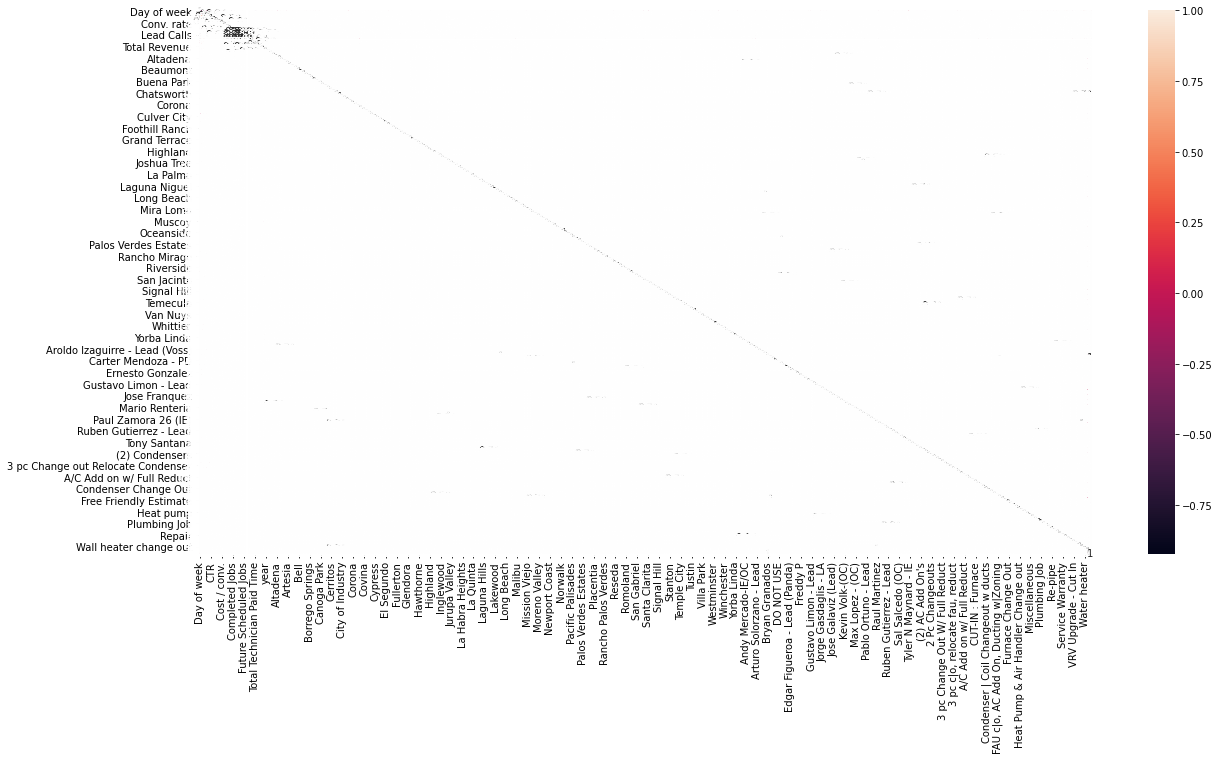

In [116]:
plt.figure(figsize=(20,10))
sns.heatmap(end_df.corr(method='spearman'),annot=True)
plt.show()


No handles with labels found to put in legend.


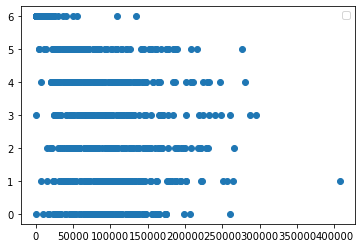

No handles with labels found to put in legend.


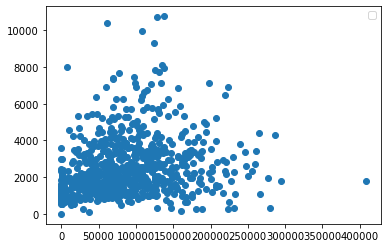

No handles with labels found to put in legend.


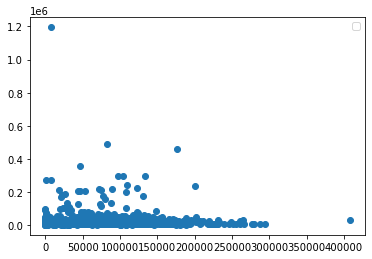

No handles with labels found to put in legend.


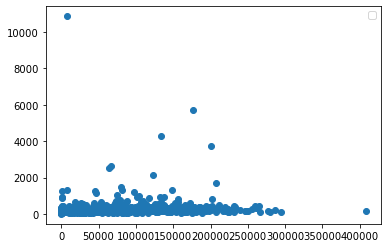

No handles with labels found to put in legend.


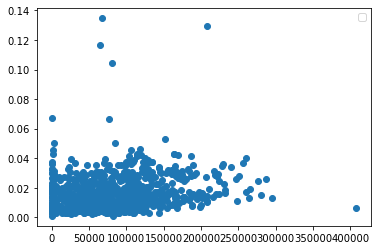

No handles with labels found to put in legend.


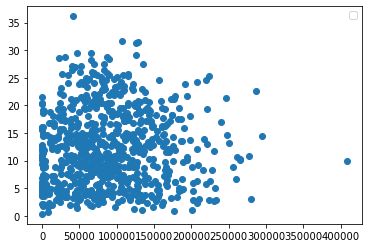

No handles with labels found to put in legend.


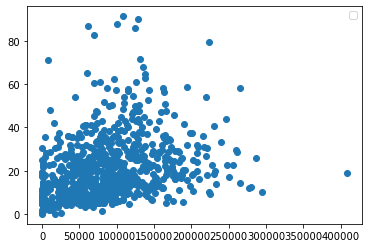

No handles with labels found to put in legend.


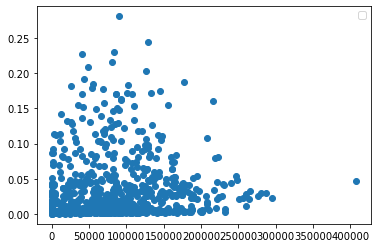

No handles with labels found to put in legend.


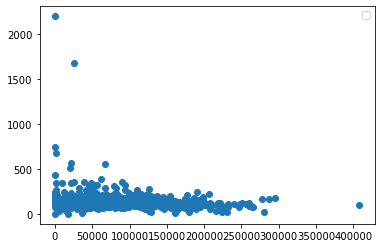

No handles with labels found to put in legend.


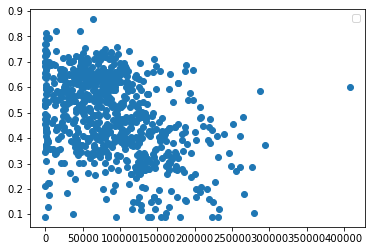

No handles with labels found to put in legend.


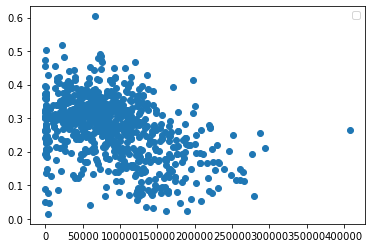

No handles with labels found to put in legend.


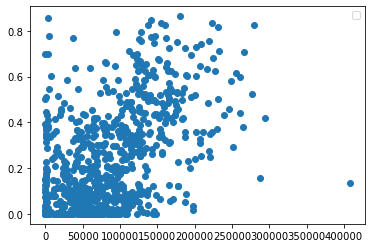

No handles with labels found to put in legend.


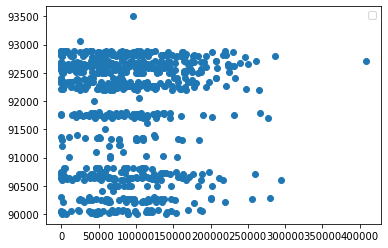

No handles with labels found to put in legend.


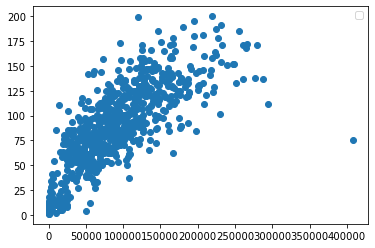

No handles with labels found to put in legend.


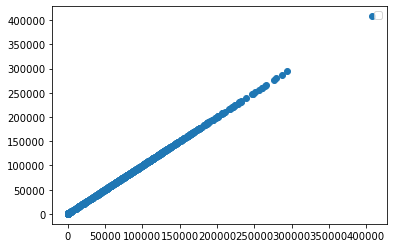

No handles with labels found to put in legend.


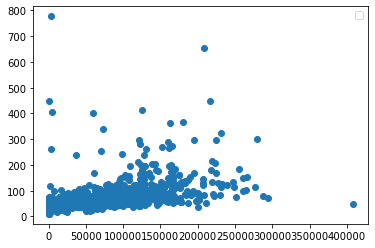

No handles with labels found to put in legend.


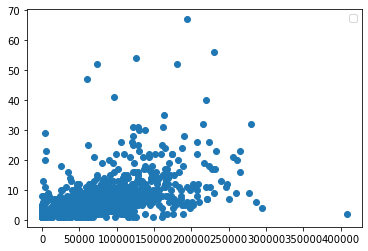

No handles with labels found to put in legend.


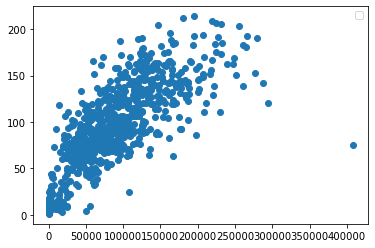

No handles with labels found to put in legend.


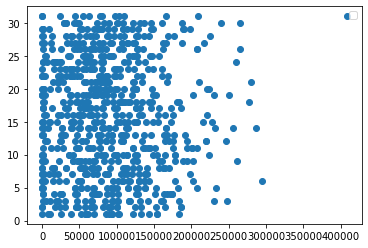

No handles with labels found to put in legend.


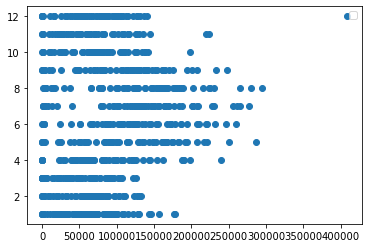

No handles with labels found to put in legend.


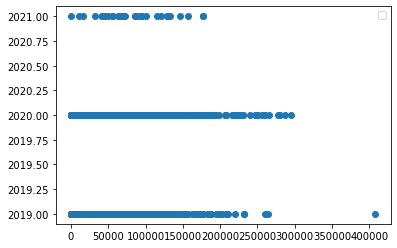

No handles with labels found to put in legend.


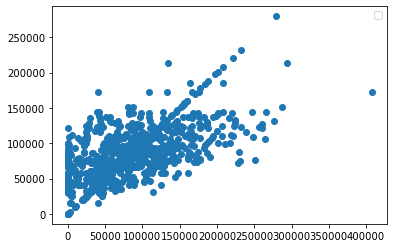

In [63]:
for i in new_df.columns:

    plt.scatter(new_df['Income'],new_df[i])
    plt.legend()
    plt.show()

In [117]:
end_df.head()

,Day,Day of week,Cost,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost / conv.,Search Impr. share,Search Lost IS (rank),Search Lost IS (budget),Period,Completed Jobs,Income,Lead Calls,Canceled Jobs,Future Scheduled Jobs,Converted,Pricebook Price,Sold Hours,Total Technician Paid Time,Total Revenue,day,month,year,Zip_income,Alhambra,Aliso Viejo,Altadena,Anaheim,Apple Valley,Arcadia,Artesia,Azusa,Banning,Beaumont,Bell,Bell Canyon,Beverly Hills,Bloomington,Borrego Springs,Brea,Buena Park,Burbank,Canoga Park,Canyon Lake,Carson,Cathedral City,Cerritos,Chatsworth,Chino,Chino Hills,City of Industry,Claremont,Colton,Compton,Corona,Corona Del Mar,Costa Mesa,Coto de Caza,Covina,Crestline,Cudahy,Culver City,Cypress,Desert Hot Springs,Diamond Bar,Downey,El Segundo,Fontana,Foothill Ranch,Fountain Valley,Fullerton,Garden Grove,Gardena,Glendale,Glendora,Grand Terrace,Hacienda Heights,Harbor City,Hawthorne,Hemet,Hermosa Beach,Hesperia,Highland,Huntington Beach,Indian Wells,Indio,Inglewood,Irvine,Irwindale,Joshua Tree,Jurupa Valley,La Cañada Flintridge,La Crescenta-Montrose,La Habra,La Habra Heights,La Mirada,La Palma,La Puente,La Quinta,La Verne,La habra,Laguna Beach,Laguna Hills,Laguna Niguel,Lake Elsinore,Lake Forest,Lakewood,Lawndale,Loma Linda,Lomita,Long Beach,Los Alamitos,Los Angeles,Lynwood,Malibu,Manhattan Beach,Menifee,Mira Loma,Mission Viejo,Mojave,Montclair,Montebello,Moreno Valley,Murrieta,Muscoy,Newport Beach,Newport Coast,Norco,North Hills,Northridge,Norwalk,Oceanside,Ontario,Orange,Pacific Palisades,Pacoima,Palm Desert,Palm Springs,Palos Verdes Estates,Pasadena,Perris,Pico Rivera,Placentia,Pomona,Rancho Cucamonga,Rancho Mirage,Rancho Palos Verdes,Rancho Santa Margarita,Redlands,Redondo Beach,Reseda,Rialto,Riverside,Rolling Hills Estates,Romoland,Rowland Heights,San Bernardino,San Dimas,San Gabriel,San Jacinto,San Pedro,Santa Ana,Santa Clarita,Santa Fe Springs,Santa Monica,Sierra Madre,Signal Hill,Simi Valley,South El Monte,South Pasadena,Stanton,Sun Valley,Sunset Beach,Temecula,Temple City,Topanga,Torrance,Trabuco Canyon,Tustin,Upland,Van Nuys,Victorville,Villa Park,Walnut,West Covina,West Hills,Westminster,Whittier,Wildomar,Wilmington,Winchester,Windsor Hills,Winnetka,Woodland Hills,Yorba Linda,Yucaipa,Yucca Valley,Andres Soberanis-55,Andy Mercado-IE/OC,Angel Gutierrez - OC,Antonio Gonzalez-02 (XS),Aroldo Izaguirre - Lead (Voss),Arturo Solorzano - Lead,Axel Garcia - IE,Brandon Rodriguez,Brian Hawkins (IE),Bryan Granados,Carlos Acevedo-(OC),Carter Mendoza - PD,Cesar Ruvalcaba,DO NOT USE,Danny Moreno,Darren Aguilar,Eddie Ridgill - (OC),Edgar Figueroa - Lead (Panda),Ernesto Gonzalez,Ernesto Perez (Ernie),Fernando Rivera (OC),Freddy P,Gabriel Lozano - Lead,George Ramirez - (OC),Gonzalo Gonzales - Lead (Chona),Gustavo Limon - Lead,Jesus Solorio - Lead (Chucho),Joe Magana,Jonatan Dimas- (IE),Jorge Gasdaglis - LA,Jorge Perez - Lead,Jose Alonzo - Lead (Checho),Jose Franquez,Jose Galaviz (Lead),Jose Martinez,Juan Herrera - Lead,Juan Rodriguez - Lead,Kevin Volk-(OC),Marcus Williams - (IE),Mario Renteria,Mark Ocampo,Max Lopez - (OC),Morgan Valencia-(IE),Omar Ramos-PD/IE,Pablo Aguilar,Pablo Ortuno - Lead,Paul Zamora 26 (IE),Pedro Ortega - (IE),Peter Lopez - Lead,Raul Martinez,Ricardo Murguia - Lead,Robert Ramos-41 (IE),Roger Cuadra (OC),Ruben Gutierrez - Lead,Ruben Ramos-57 (OC),Ruben Tamayo - Lead,Ruben Vicuna (PD),Sal Salcedo (OC),Simon Solorio (Lead),Steve Arias-OC,Tony Santana,Tyler N Maynard - IE,Ulises Jimenez - Lead (Tano),Zachary Troutwine (PD),(2) 3 pc Changeouts & Water Heater,(2) AC Add On's,(2) Ac Add On + Mini-split,(2) Condensers,(2) Package Units,2 Pc Changeouts,3 Pc Change Out & 1 Mini Split,3 pc Change Out,3 pc Change Out Relocate Furnace,3 pc Change Out W/ Full Reduct,3 pc Change out Relocate Condenser,3 pc Change out Relocate Condenser Reduct,3 pc changeout w | zoning,"3 pc c|o, relocate fau, reduct",A/C Add On,"A/C Add On, Furnace Relocate","A/C Add On, Furnace Relocate & Reduct",A/C Add on w/ Full Reduct,Air

In [120]:
y=end_df['Income']
X=end_df.drop(['Income','Period','Day'],axis=1)

In [121]:
X.head()

,Day of week,Cost,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost / conv.,Search Impr. share,Search Lost IS (rank),Search Lost IS (budget),Completed Jobs,Lead Calls,Canceled Jobs,Future Scheduled Jobs,Converted,Pricebook Price,Sold Hours,Total Technician Paid Time,Total Revenue,day,month,year,Zip_income,Alhambra,Aliso Viejo,Altadena,Anaheim,Apple Valley,Arcadia,Artesia,Azusa,Banning,Beaumont,Bell,Bell Canyon,Beverly Hills,Bloomington,Borrego Springs,Brea,Buena Park,Burbank,Canoga Park,Canyon Lake,Carson,Cathedral City,Cerritos,Chatsworth,Chino,Chino Hills,City of Industry,Claremont,Colton,Compton,Corona,Corona Del Mar,Costa Mesa,Coto de Caza,Covina,Crestline,Cudahy,Culver City,Cypress,Desert Hot Springs,Diamond Bar,Downey,El Segundo,Fontana,Foothill Ranch,Fountain Valley,Fullerton,Garden Grove,Gardena,Glendale,Glendora,Grand Terrace,Hacienda Heights,Harbor City,Hawthorne,Hemet,Hermosa Beach,Hesperia,Highland,Huntington Beach,Indian Wells,Indio,Inglewood,Irvine,Irwindale,Joshua Tree,Jurupa Valley,La Cañada Flintridge,La Crescenta-Montrose,La Habra,La Habra Heights,La Mirada,La Palma,La Puente,La Quinta,La Verne,La habra,Laguna Beach,Laguna Hills,Laguna Niguel,Lake Elsinore,Lake Forest,Lakewood,Lawndale,Loma Linda,Lomita,Long Beach,Los Alamitos,Los Angeles,Lynwood,Malibu,Manhattan Beach,Menifee,Mira Loma,Mission Viejo,Mojave,Montclair,Montebello,Moreno Valley,Murrieta,Muscoy,Newport Beach,Newport Coast,Norco,North Hills,Northridge,Norwalk,Oceanside,Ontario,Orange,Pacific Palisades,Pacoima,Palm Desert,Palm Springs,Palos Verdes Estates,Pasadena,Perris,Pico Rivera,Placentia,Pomona,Rancho Cucamonga,Rancho Mirage,Rancho Palos Verdes,Rancho Santa Margarita,Redlands,Redondo Beach,Reseda,Rialto,Riverside,Rolling Hills Estates,Romoland,Rowland Heights,San Bernardino,San Dimas,San Gabriel,San Jacinto,San Pedro,Santa Ana,Santa Clarita,Santa Fe Springs,Santa Monica,Sierra Madre,Signal Hill,Simi Valley,South El Monte,South Pasadena,Stanton,Sun Valley,Sunset Beach,Temecula,Temple City,Topanga,Torrance,Trabuco Canyon,Tustin,Upland,Van Nuys,Victorville,Villa Park,Walnut,West Covina,West Hills,Westminster,Whittier,Wildomar,Wilmington,Winchester,Windsor Hills,Winnetka,Woodland Hills,Yorba Linda,Yucaipa,Yucca Valley,Andres Soberanis-55,Andy Mercado-IE/OC,Angel Gutierrez - OC,Antonio Gonzalez-02 (XS),Aroldo Izaguirre - Lead (Voss),Arturo Solorzano - Lead,Axel Garcia - IE,Brandon Rodriguez,Brian Hawkins (IE),Bryan Granados,Carlos Acevedo-(OC),Carter Mendoza - PD,Cesar Ruvalcaba,DO NOT USE,Danny Moreno,Darren Aguilar,Eddie Ridgill - (OC),Edgar Figueroa - Lead (Panda),Ernesto Gonzalez,Ernesto Perez (Ernie),Fernando Rivera (OC),Freddy P,Gabriel Lozano - Lead,George Ramirez - (OC),Gonzalo Gonzales - Lead (Chona),Gustavo Limon - Lead,Jesus Solorio - Lead (Chucho),Joe Magana,Jonatan Dimas- (IE),Jorge Gasdaglis - LA,Jorge Perez - Lead,Jose Alonzo - Lead (Checho),Jose Franquez,Jose Galaviz (Lead),Jose Martinez,Juan Herrera - Lead,Juan Rodriguez - Lead,Kevin Volk-(OC),Marcus Williams - (IE),Mario Renteria,Mark Ocampo,Max Lopez - (OC),Morgan Valencia-(IE),Omar Ramos-PD/IE,Pablo Aguilar,Pablo Ortuno - Lead,Paul Zamora 26 (IE),Pedro Ortega - (IE),Peter Lopez - Lead,Raul Martinez,Ricardo Murguia - Lead,Robert Ramos-41 (IE),Roger Cuadra (OC),Ruben Gutierrez - Lead,Ruben Ramos-57 (OC),Ruben Tamayo - Lead,Ruben Vicuna (PD),Sal Salcedo (OC),Simon Solorio (Lead),Steve Arias-OC,Tony Santana,Tyler N Maynard - IE,Ulises Jimenez - Lead (Tano),Zachary Troutwine (PD),(2) 3 pc Changeouts & Water Heater,(2) AC Add On's,(2) Ac Add On + Mini-split,(2) Condensers,(2) Package Units,2 Pc Changeouts,3 Pc Change Out & 1 Mini Split,3 pc Change Out,3 pc Change Out Relocate Furnace,3 pc Change Out W/ Full Reduct,3 pc Change out Relocate Condenser,3 pc Change out Relocate Condenser Reduct,3 pc changeout w | zoning,"3 pc c|o, relocate fau, reduct",A/C Add On,"A/C Add On, Furnace Relocate","A/C Add On, Furnace Relocate & Reduct",A/C Add on w/ Full Reduct,Air Handler & Heat & 

In [122]:
X_train=X[0:650]
X_cv=X[650:710]
X_test=X[710:]

In [123]:
y_train=y[0:650]
y_cv=y[650:710]
y_test=y[710:]

In [124]:
import xgboost as xgb


In [125]:
xgbst_reg=xgb.XGBRegressor()

In [126]:
xgbst_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
xgbst_reg.score(X_train,y_train)

0.9996509695628338

In [128]:
X_train.isnull().sum()

Day of week                     0
Cost                            0
Impressions                     0
Clicks                          0
CTR                             0
                               ..
Wall heater change out          0
Warranty                        0
Water heater                    0
XPP Member System Diagnostic    0
coil only                       0
Length: 326, dtype: int64

In [79]:
X_train['Canceled Jobs'].unique()

array([13.,  5.,  7.,  4., 11.,  8., 10.,  1., 12.,  2.,  3.,  6., 14.,
        9., 15., nan, 18., 16., 52., 67., 40., 17., 19., 30., 26., 24.,
       41., 23., 25., 21., 20., 22., 47., 31., 28., 35., 32., 54., 56.,
       29.])

In [81]:
X_train['Canceled Jobs'].median()

7.0

In [82]:
X_train['Canceled Jobs']=X_train['Canceled Jobs'].fillna(7)

C:\Users\vksva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
X_train.isnull().sum()

Day of week                0
Cost                       0
Impressions                0
Clicks                     0
CTR                        0
Avg. CPC                   0
Conversions                0
Conv. rate                 0
Cost / conv.               0
Search Impr. share         0
Search Lost IS (rank)      0
Search Lost IS (budget)    0
Completed Jobs             1
Lead Calls                 0
Canceled Jobs              0
Future Scheduled Jobs      0
day                        0
month                      0
year                       0
Zip_income                 0
dtype: int64

In [86]:
X_train['Canceled Jobs'].unique()

array([13.,  5.,  7.,  4., 11.,  8., 10.,  1., 12.,  2.,  3.,  6., 14.,
        9., 15., 18., 16., 52., 67., 40., 17., 19., 30., 26., 24., 41.,
       23., 25., 21., 20., 22., 47., 31., 28., 35., 32., 54., 56., 29.])

In [91]:
X_train['Completed Jobs'].median()


83.0

In [92]:
X_train['Completed Jobs']=X_train['Completed Jobs'].fillna(83.0)

C:\Users\vksva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
X_train.isnull().sum()

Day of week                0
Cost                       0
Impressions                0
Clicks                     0
CTR                        0
Avg. CPC                   0
Conversions                0
Conv. rate                 0
Cost / conv.               0
Search Impr. share         0
Search Lost IS (rank)      0
Search Lost IS (budget)    0
Completed Jobs             0
Lead Calls                 0
Canceled Jobs              0
Future Scheduled Jobs      0
day                        0
month                      0
year                       0
Zip_income                 0
dtype: int64

In [94]:
xgbst_reg=xgb.XGBRegressor()

In [95]:
xgbst_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [129]:
xgbst_reg.score(X_train,y_train)

0.9996509695628338

In [98]:
np.isnan(X_train).sum()

Day of week                0
Cost                       0
Impressions                0
Clicks                     0
CTR                        0
Avg. CPC                   0
Conversions                0
Conv. rate                 0
Cost / conv.               0
Search Impr. share         0
Search Lost IS (rank)      0
Search Lost IS (budget)    0
Completed Jobs             0
Lead Calls                 0
Canceled Jobs              0
Future Scheduled Jobs      0
day                        0
month                      0
year                       0
Zip_income                 0
dtype: int64

In [100]:
y_train.unique()

array([8.1680500e+04, 1.0088500e+05, 2.5694200e+04, 9.2705000e+04,
       1.4062000e+04, 1.0981400e+05, 6.7063400e+04, 4.8987000e+04,
       9.9384000e+04, 4.7735350e+04, 5.3427000e+04, 5.9000000e+02,
       4.9952000e+04, 1.0059700e+05, 6.6916720e+04, 6.1388000e+04,
       1.4377400e+05, 5.5356000e+04, 1.9830000e+03, 7.3395000e+04,
       4.2760500e+04, 9.6788000e+04, 5.6730000e+04, 5.9833000e+04,
       8.5371000e+04, 2.3200000e+02, 6.4647000e+04, 8.8056000e+04,
       4.6889750e+04, 9.7131800e+04, 7.5350000e+03, 4.5783000e+04,
       6.4900000e+02, 7.4727350e+04, 8.7222200e+04, 7.9325500e+04,
       7.3374200e+04, 5.1141650e+04, 7.0589000e+04, 8.7400000e+02,
       6.1170000e+04, 8.5107650e+04, 7.4873000e+04, 9.7759000e+04,
       8.0280000e+04, 5.2833000e+04, 4.4500000e+02, 1.1160535e+05,
       8.0229000e+04, 7.5164500e+04, 8.7928600e+04, 9.6444350e+04,
       6.3786800e+04, 1.3906000e+04, 1.2650400e+05, 1.0247970e+05,
       7.6149000e+04, 3.2349500e+04, 9.0048700e+04, 5.7458000e

In [101]:
y_train.median()

79843.6

In [102]:
y_train=y_train.fillna(79843.6)

In [103]:
y_train.isnull().sum()

0

In [104]:
xgbst_reg.score(X_train,y_train)

0.9974760038347801

In [130]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgbst_reg,X_train,y_train,cv=5)

In [131]:
score.mean()

0.4186834211447589

In [132]:
X_train.columns

Index(['Day of week', 'Cost', 'Impressions', 'Clicks', 'CTR', 'Avg. CPC',
       'Conversions', 'Conv. rate', 'Cost / conv.', 'Search Impr. share',
       ...
       'System Diagnostic', 'System Tune-Up', 'VRV Upgrade - Change Out',
       'VRV Upgrade - Cut In', 'Waiting on contract', 'Wall heater change out',
       'Warranty', 'Water heater', 'XPP Member System Diagnostic',
       'coil only'],
      dtype='object', length=326)

In [133]:
X_train=X_train.drop(['Conversions','Future Scheduled Jobs'],axis=1)

In [134]:
xgbst_reg_1=xgb.XGBRegressor()

In [135]:
xgbst_reg_1.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [136]:
xgbst_reg_1.score(X_train,y_train)

0.9996656198565542

In [137]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgbst_reg_1,X_train,y_train,cv=5)

In [138]:
score.mean()

0.42215272881913435

In [139]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint


parameters = {'n_estimators': randint(100,1200),
               'learning_rate': [0.001,0.002,0.003,0.005,0.01,0.04,0.05,0.1,0.2,0.3,0.4,0.5,0.6],
               'max_depth': randint(5,40),
               'subsample': [0.5,0.6,0.7,0.8],
               'min_child_weight': randint(1,10)  }


In [140]:
base_learner=xgb.XGBRegressor()


In [141]:
tuned_model= RandomizedSearchCV(estimator = base_learner, param_distributions = parameters,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=0)

In [ ]:
tuned_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=863, subsample=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=863, subsample=0.8, total=   4.5s
[CV] learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=863, subsample=0.8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV]  learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=863, subsample=0.8, total=   4.4s
[CV] learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=863, subsample=0.8 
[CV]  learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=863, subsample=0.8, total=   4.4s
[CV] learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=863, subsample=0.8 
[CV]  learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=863, subsample=0.8, total=   4.3s
[CV] learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=863, subsample=0.8 
[CV]  learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=863, subsample=0.8, total=   4.3s
[CV] learning_rate=0.1, max_depth=14, min_child_weight=4, n_estimators=377, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=14, min_child_weight=4, n_estimators=377, subsample=0.7, total=   3.8s
[CV] learning_rate=0.1, max_depth=14, min_child_weight=4, n_estimators=377, subsample=0.7 
[CV]  learning_rate=0.

[CV]  learning_rate=0.001, max_depth=6, min_child_weight=1, n_estimators=643, subsample=0.7, total=   4.2s
[CV] learning_rate=0.001, max_depth=6, min_child_weight=1, n_estimators=643, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=6, min_child_weight=1, n_estimators=643, subsample=0.7, total=   4.3s
[CV] learning_rate=0.01, max_depth=28, min_child_weight=4, n_estimators=610, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=28, min_child_weight=4, n_estimators=610, subsample=0.8, total=   7.1s
[CV] learning_rate=0.01, max_depth=28, min_child_weight=4, n_estimators=610, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=28, min_child_weight=4, n_estimators=610, subsample=0.8, total=   7.2s
[CV] learning_rate=0.01, max_depth=28, min_child_weight=4, n_estimators=610, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=28, min_child_weight=4, n_estimators=610, subsample=0.8, total=   6.9s
[CV] learning_rate=0.01, max_depth=28, min_child_weight=4, n_estimators=610, subsample=0.8 
[CV] 

[CV]  learning_rate=0.04, max_depth=26, min_child_weight=1, n_estimators=269, subsample=0.8, total=   5.8s
[CV] learning_rate=0.04, max_depth=26, min_child_weight=1, n_estimators=269, subsample=0.8 
[CV]  learning_rate=0.04, max_depth=26, min_child_weight=1, n_estimators=269, subsample=0.8, total=   5.3s
[CV] learning_rate=0.04, max_depth=26, min_child_weight=1, n_estimators=269, subsample=0.8 
[CV]  learning_rate=0.04, max_depth=26, min_child_weight=1, n_estimators=269, subsample=0.8, total=   5.3s
[CV] learning_rate=0.04, max_depth=26, min_child_weight=1, n_estimators=269, subsample=0.8 
[CV]  learning_rate=0.04, max_depth=26, min_child_weight=1, n_estimators=269, subsample=0.8, total=   5.2s
[CV] learning_rate=0.04, max_depth=26, min_child_weight=1, n_estimators=269, subsample=0.8 
[CV]  learning_rate=0.04, max_depth=26, min_child_weight=1, n_estimators=269, subsample=0.8, total=   5.6s
[CV] learning_rate=0.001, max_depth=36, min_child_weight=6, n_estimators=356, subsample=0.6 
[CV]

[CV]  learning_rate=0.05, max_depth=16, min_child_weight=3, n_estimators=407, subsample=0.5, total=   3.7s
[CV] learning_rate=0.05, max_depth=16, min_child_weight=3, n_estimators=407, subsample=0.5 
[CV]  learning_rate=0.05, max_depth=16, min_child_weight=3, n_estimators=407, subsample=0.5, total=   3.8s
[CV] learning_rate=0.05, max_depth=16, min_child_weight=3, n_estimators=407, subsample=0.5 
[CV]  learning_rate=0.05, max_depth=16, min_child_weight=3, n_estimators=407, subsample=0.5, total=   3.7s
[CV] learning_rate=0.001, max_depth=5, min_child_weight=7, n_estimators=375, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=5, min_child_weight=7, n_estimators=375, subsample=0.7, total=   1.9s
[CV] learning_rate=0.001, max_depth=5, min_child_weight=7, n_estimators=375, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=5, min_child_weight=7, n_estimators=375, subsample=0.7, total=   1.9s
[CV] learning_rate=0.001, max_depth=5, min_child_weight=7, n_estimators=375, subsample=0.7 
[CV] 

[CV]  learning_rate=0.001, max_depth=11, min_child_weight=6, n_estimators=387, subsample=0.6, total=   2.3s
[CV] learning_rate=0.1, max_depth=29, min_child_weight=3, n_estimators=307, subsample=0.8 
[CV]  learning_rate=0.1, max_depth=29, min_child_weight=3, n_estimators=307, subsample=0.8, total=   5.1s
[CV] learning_rate=0.1, max_depth=29, min_child_weight=3, n_estimators=307, subsample=0.8 
[CV]  learning_rate=0.1, max_depth=29, min_child_weight=3, n_estimators=307, subsample=0.8, total=   5.0s
[CV] learning_rate=0.1, max_depth=29, min_child_weight=3, n_estimators=307, subsample=0.8 
[CV]  learning_rate=0.1, max_depth=29, min_child_weight=3, n_estimators=307, subsample=0.8, total=   4.9s
[CV] learning_rate=0.1, max_depth=29, min_child_weight=3, n_estimators=307, subsample=0.8 
[CV]  learning_rate=0.1, max_depth=29, min_child_weight=3, n_estimators=307, subsample=0.8, total=   4.8s
[CV] learning_rate=0.1, max_depth=29, min_child_weight=3, n_estimators=307, subsample=0.8 
[CV]  learnin

[CV]  learning_rate=0.3, max_depth=14, min_child_weight=8, n_estimators=830, subsample=0.7, total=   7.6s
[CV] learning_rate=0.3, max_depth=14, min_child_weight=8, n_estimators=830, subsample=0.7 
[CV]  learning_rate=0.3, max_depth=14, min_child_weight=8, n_estimators=830, subsample=0.7, total=   7.2s
[CV] learning_rate=0.3, max_depth=14, min_child_weight=8, n_estimators=830, subsample=0.7 
[CV]  learning_rate=0.3, max_depth=14, min_child_weight=8, n_estimators=830, subsample=0.7, total=   7.3s
[CV] learning_rate=0.3, max_depth=14, min_child_weight=8, n_estimators=830, subsample=0.7 
[CV]  learning_rate=0.3, max_depth=14, min_child_weight=8, n_estimators=830, subsample=0.7, total=   7.3s
[CV] learning_rate=0.6, max_depth=8, min_child_weight=8, n_estimators=1185, subsample=0.6 
[CV]  learning_rate=0.6, max_depth=8, min_child_weight=8, n_estimators=1185, subsample=0.6, total=   7.0s
[CV] learning_rate=0.6, max_depth=8, min_child_weight=8, n_estimators=1185, subsample=0.6 


In [120]:
tuned_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 36,
 'min_child_weight': 9,
 'n_estimators': 357,
 'subsample': 0.6}

In [121]:
tuned_model.best_score_

-1353287657.4207723

In [122]:
best_model= xgb.XGBRegressor(learning_rate=0.01,max_depth=36,min_child_weight=9,n_estimators=357,subsample=0.6)

In [123]:
best_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=36,
             min_child_weight=9, missing=nan, monotone_constraints='()',
             n_estimators=357, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [124]:
best_model.score(X_train,y_train)

0.9031360015358909

In [125]:
score_cv= cross_val_score(best_model,X_train,y_train,cv=5)

In [126]:
score_cv.mean()

0.5384105480393694

In [127]:
X_cv.isnull().sum()

Day of week                0
Cost                       0
Impressions                0
Clicks                     0
CTR                        0
Avg. CPC                   0
Conversions                0
Conv. rate                 0
Cost / conv.               0
Search Impr. share         0
Search Lost IS (rank)      0
Search Lost IS (budget)    0
Completed Jobs             3
Lead Calls                 0
Canceled Jobs              5
Future Scheduled Jobs      0
day                        0
month                      0
year                       0
Zip_income                 0
dtype: int64

In [128]:
X_cv['Completed Jobs'].median()

104.0

In [129]:
X_cv['Completed Jobs']=X_cv['Completed Jobs'].fillna(104.0)

C:\Users\vksva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [131]:
y_cv.median()

82317.3

In [132]:
y_cv=y_cv.fillna(82317.3)

In [133]:
y_cv.isnull().sum()

0

In [135]:
X_cv=X_cv.drop(['Conversions','Future Scheduled Jobs'],axis=1)

In [136]:
best_model.score(X_cv,y_cv)

0.573119584416315

In [138]:
X_test.isnull().sum()

Day of week                0
Cost                       0
Impressions                0
Clicks                     0
CTR                        0
Avg. CPC                   0
Conversions                0
Conv. rate                 0
Cost / conv.               0
Search Impr. share         0
Search Lost IS (rank)      0
Search Lost IS (budget)    0
Completed Jobs             1
Lead Calls                 0
Canceled Jobs              1
Future Scheduled Jobs      0
day                        0
month                      0
year                       0
Zip_income                 0
dtype: int64

In [141]:
X_test['Completed Jobs'].median()

106.0

In [142]:
X_test['Completed Jobs']=X_test['Completed Jobs'].fillna(106.0)

C:\Users\vksva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
y_test.median()

86287.17

In [145]:
y_test=y_test.fillna(86287.17)

In [147]:
X_test=X_test.drop(['Conversions','Future Scheduled Jobs'],axis=1)

In [148]:
best_model.score(X_test,y_test)

0.6334668272167434

In [149]:
pre= best_model.predict(X_test)

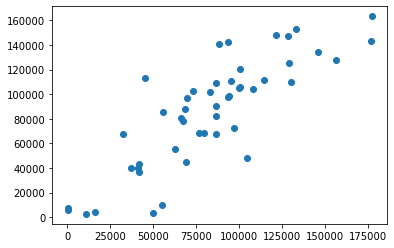

In [150]:
plt.scatter(y_test,pre)

In [151]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pre))
print('MSE:', metrics.mean_squared_error(y_test, pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pre)))

MAE: 18920.246183471678
MSE: 612668551.3986629
RMSE: 24752.14235977692


In [152]:
metrics.r2_score(y_test,pre)

0.6334668272167434